# Unveiling the Android App Market: Google Play Store Data Analysis #


## 1. Import Libraries ##

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Load Datasets ##

In [5]:
apps = pd.read_csv(r"C:\Users\vemul\OneDrive\Desktop\Internship Projects\apps.csv")
reviews = pd.read_csv(r"C:\Users\vemul\OneDrive\Desktop\Internship Projects\user_reviews.csv")

apps.head()
reviews.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## 3. Data Cleaning ##

In [9]:
apps.drop_duplicates(inplace=True)

apps['Installs'] = apps['Installs'].astype(str)\
                    .str.replace(r'[+,]', '', regex=True)\
                    .astype(float)

apps['Price'] = apps['Price'].astype(str)\
                   .str.replace(r'[\$,]', '', regex=True)

apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')

apps['Rating'] = pd.to_numeric(apps['Rating'], errors='coerce')

apps.dropna(inplace=True)


## 4. Category Exploration ##

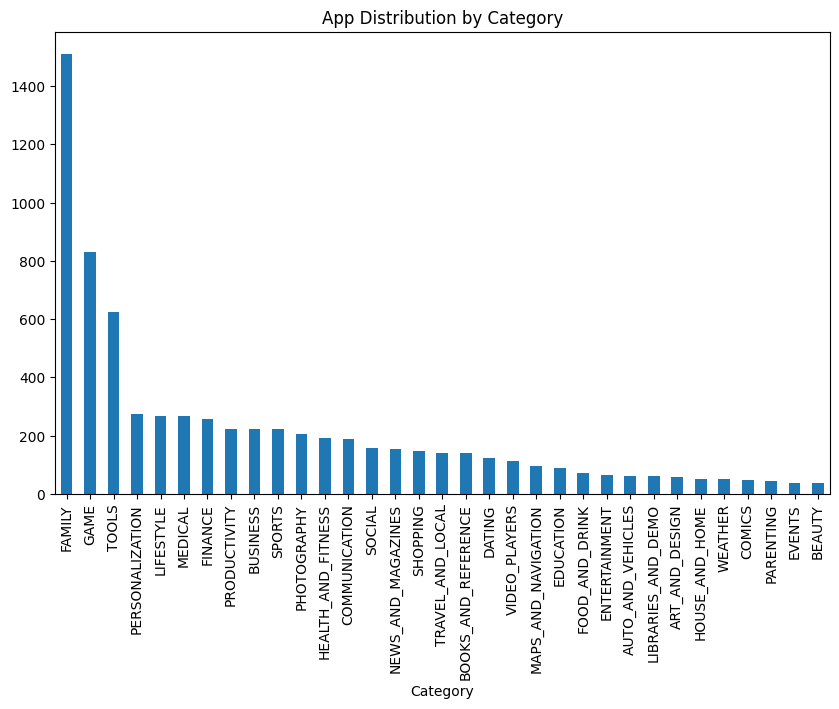

In [12]:
category_counts = apps['Category'].value_counts()

plt.figure(figsize=(10,6))
category_counts.plot(kind='bar')
plt.title("App Distribution by Category")
plt.show()


## 5. Metrics Analysis ##

### Ratings Distribution ###

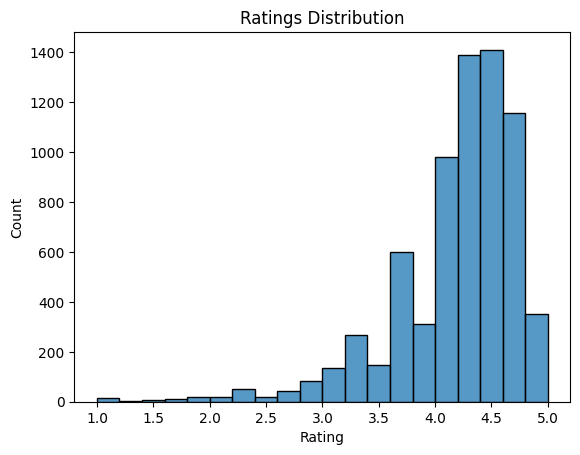

In [16]:
sns.histplot(apps['Rating'], bins=20)
plt.title("Ratings Distribution")
plt.show()


### Installs vs Rating ###

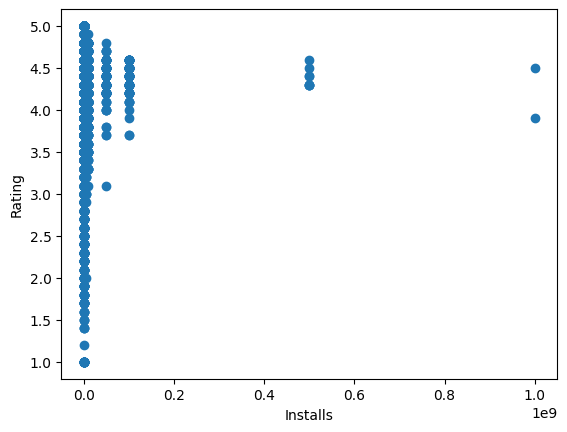

In [19]:
plt.scatter(apps['Installs'], apps['Rating'])
plt.xlabel("Installs")
plt.ylabel("Rating")
plt.show()


### Pricing Trends ###

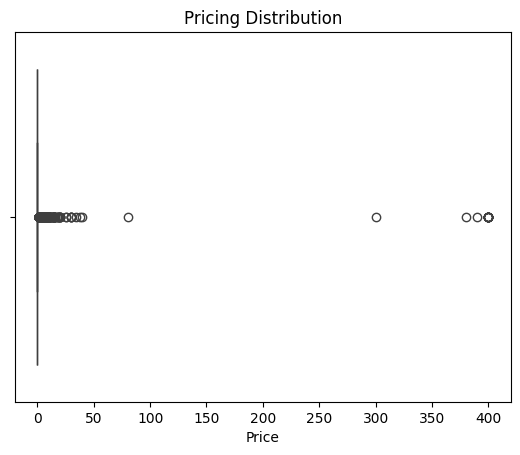

In [22]:
sns.boxplot(x=apps['Price'])
plt.title("Pricing Distribution")
plt.show()


## 6. Sentiment Analysis ##

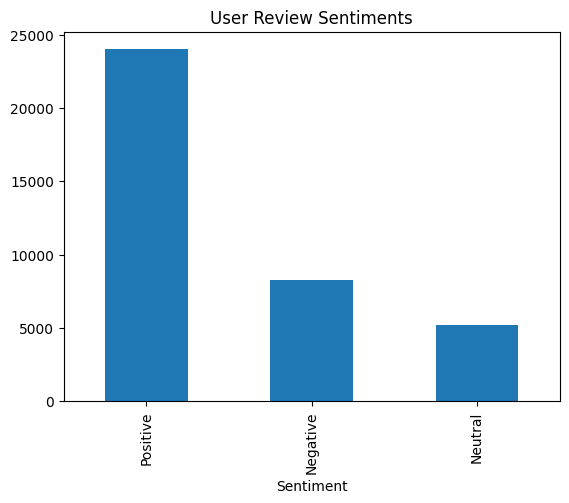

In [25]:
sentiment_counts = reviews['Sentiment'].value_counts()

sentiment_counts.plot(kind='bar', title="User Review Sentiments")
plt.show()


## 7. Insights ##
#### 1. Majority of apps belong to a few dominant categories such as Games and Tools.
#### 2. Most apps are free, with very few paid applications.
#### 3. Apps with higher installs generally maintain stable ratings.
#### 4. Positive sentiment dominates user reviews indicating general user satisfaction. 
